# <u>  <center> Titanic dataset analysis</center> </u>

<p>
    Build a predictive model that answers the question"what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
</p>
<br>


In [219]:
#Toggle code section in below notebook
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 document.getElementById('btn_toggle').value="Show Code";
 } else {
 $('div.input').show();
 document.getElementById('btn_toggle').value="Hide Code";

 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style = "float:right" type="submit" id="btn_toggle">''')

In [220]:
#Importing libraries
import pandas as pd
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [221]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

### Dataset description

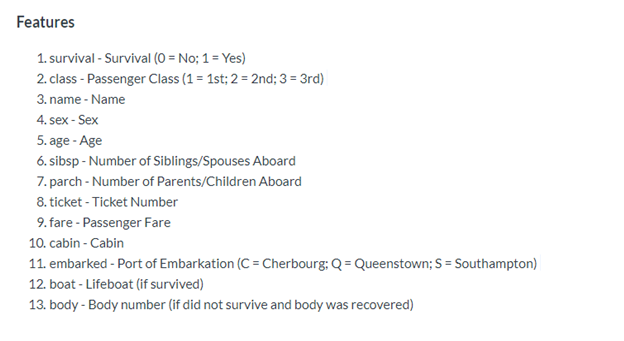

In [222]:
Image("feature_desc.png")

In [223]:
df_original = pd.read_excel('titanic3.xls')
print ("Loaded the dataset.")
print ("Sample view of the dataframe")
#sample view for dataframe
df_original.head(2)

Loaded the dataset.
Sample view of the dataframe


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [224]:
#Dataframe size
print (f'Shape of the dataframe {df_original.shape}')

Shape of the dataframe (1309, 14)



<h3 style='background-color:yellow'>
    <br>
There are 1309 records and 14 columns in the original dataset. <br>
    Each record is a the details about the person in the ship<br>
    </h3>

Columns names from the dataset.

In [225]:
#Print column names
df_original.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [226]:
#Create a dummy dataframe for cleaning operations
#This will be the dataframe using for further operations
df_input = df_original.copy()

In [227]:
print ("Null value counts in the dataframe \n")
df_input.info();

Null value counts in the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB



<h3 style='background-color:yellow'><br>
 4 integer columns, 7 String columns, 3 decimal columns are there in the dataset<br>
    </h3>

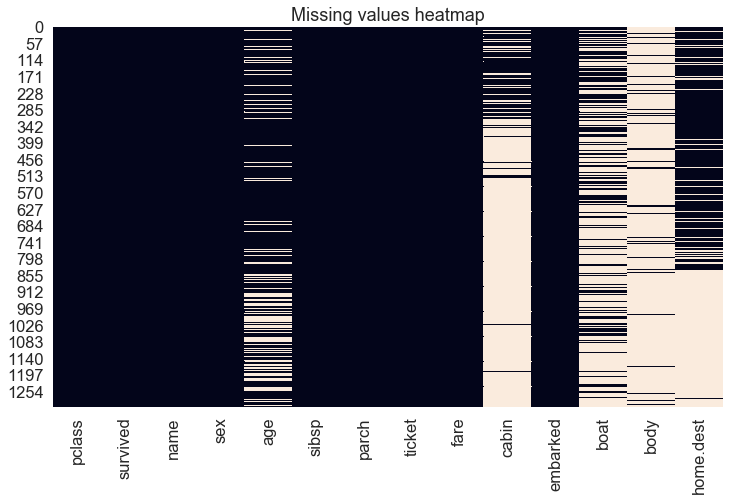

In [228]:
#Missing values 
sns.heatmap(df_input.isnull(), cbar=False).set_title("Missing values heatmap");

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


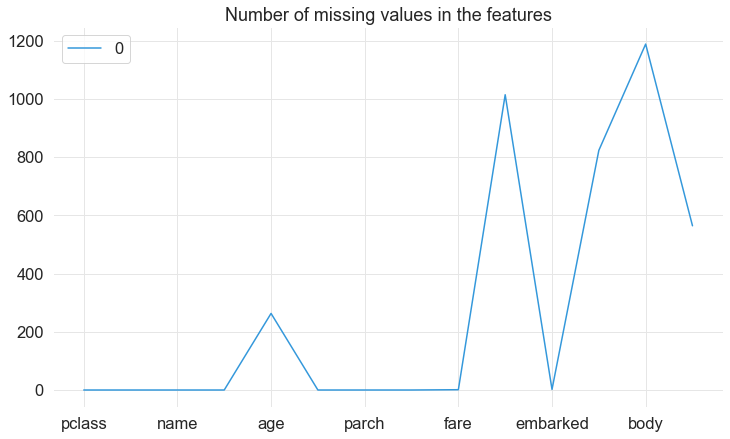

In [229]:
#Missing value counts in the dataset
pd.DataFrame(df_input.isnull().sum()).plot.line().set_title("Number of missing values in the features");
print (df_input.isnull().sum())


<h3 style='background-color:yellow'><br>
age <br>fare <br>cabin<br>embarked<br>boat<br>body<br>home.dest columns containing the missing values. <br></h3>

In [230]:
#Display the number of unique values in the dataset
print ("Count of unique values in features:")
df_input.nunique()

Count of unique values in features:


pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

<h3 style='background-color:yellow'><br>
    survived and sex columns contains 2 distinct values. <br>
    pClass and embarked contains 3 distinct values <br>
    </h3>

## <center>Features</center>

Non Survived and Survived value counts:


0    61.802903
1    38.197097
Name: survived, dtype: float64

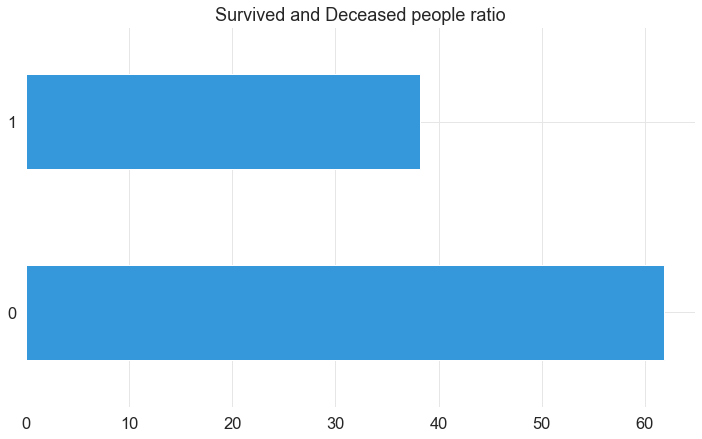

In [231]:
(df_input.survived.value_counts(normalize=True)*100).plot.barh().set_title("Survived and Deceased people ratio");
print ("Non Survived and Survived value counts:")
df_input.survived.value_counts(normalize=True)*100

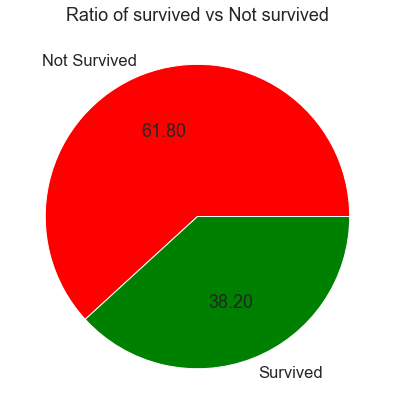

In [232]:
#plot the survival ratio
survival_cnt = np.unique(df_input.survived,return_counts = True)[1]
plt.pie(survival_cnt, labels=["Not Survived","Survived"],autopct="%.2f",colors=['red','green']);
plt.title("Ratio of survived vs Not survived");

<h3 style='background-color:yellow'><br>
    60% of people Could not able to survive and 38% people only got survived.<br>
</h3>

In [233]:
print (f"Unique values in pclass {df_input.pclass.unique()}")
print ((df_input.pclass.value_counts()))

Unique values in pclass [1 2 3]
3    709
1    323
2    277
Name: pclass, dtype: int64


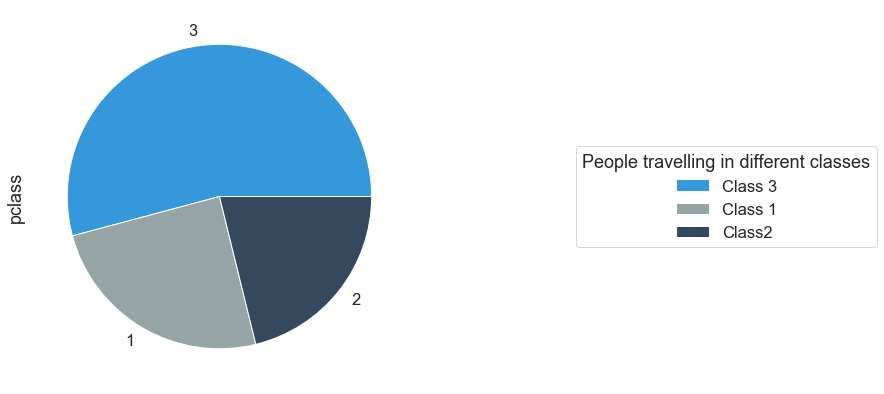

In [234]:
fig_class = df_input.pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class2"], loc="center right", bbox_to_anchor = (2.25, 0.5)).set_title ("People travelling in different classes")

<h3 style='background-color:yellow'><br>
Pclass or Passenger class denotes the travelling class of the passenger. There were three classes named 1,2 and 3.<br><br>
Majority of the people(709) travelled in 3rd class. 323 people travelled in 1st class and 277 people travelled in 2nd class.<br>
</h3>    

        PercentageSurvived  PercentageNotSurvived
Class1               61.92                  38.08
Class2               42.96                  57.04
Class3               25.53                  74.47


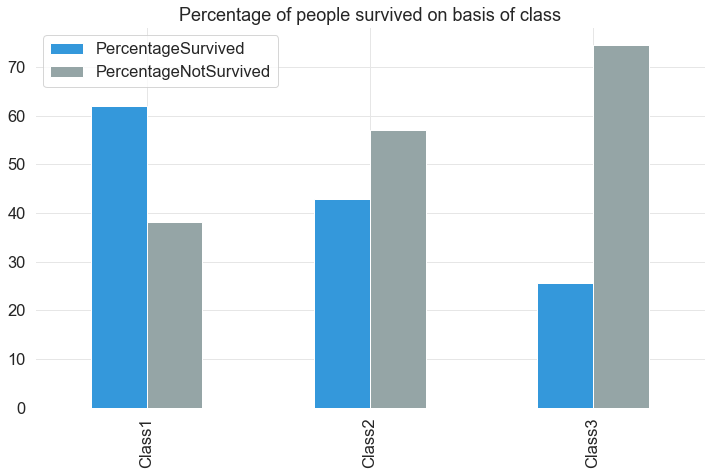

In [235]:
pclass1_survivor_distribution=round ((df_input[df_input.pclass==1].survived ==1).value_counts()[1] / len(df_input[df_input.pclass==1])*100,2)
pclass2_survivor_distribution=round ((df_input[df_input.pclass==2].survived ==1).value_counts()[1] / len(df_input[df_input.pclass==2])*100,2)
pclass3_survivor_distribution=round ((df_input[df_input.pclass==3].survived ==1).value_counts()[1] / len(df_input[df_input.pclass==3])*100,2)
pclass_perc_df=pd.DataFrame({"PercentageSurvived":{"Class1":pclass1_survivor_distribution,"Class2":pclass2_survivor_distribution,"Class3":pclass3_survivor_distribution},
                            "PercentageNotSurvived":{"Class1":100-pclass1_survivor_distribution,"Class2":100-pclass2_survivor_distribution,"Class3":100-pclass3_survivor_distribution} })
print (pclass_perc_df)
pclass_perc_df.plot.bar().set_title("Percentage of people survived on basis of class");

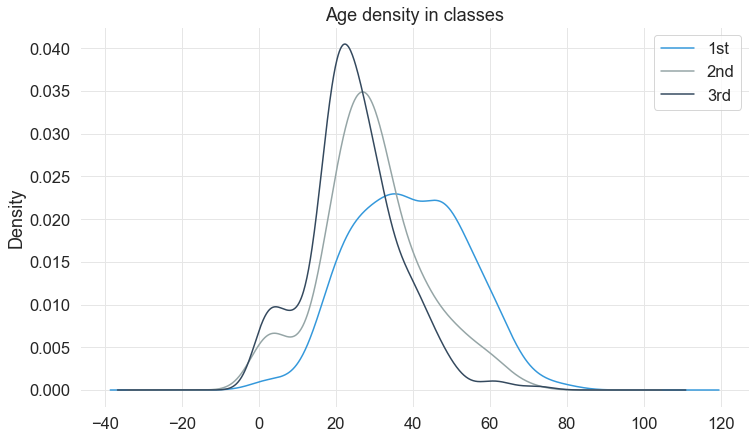

In [236]:
for x in [1,2,3]:
    df_input[df_input.pclass==x]["age"].plot(kind='kde')
plt.title("Age density in classes");
plt.legend(["1st","2nd","3rd"]);

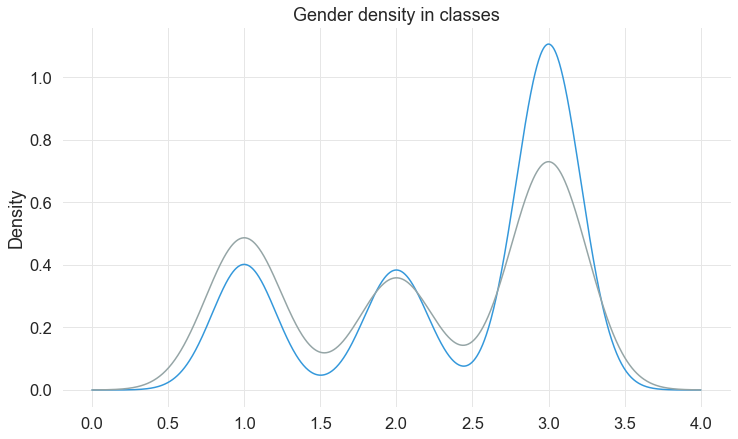

In [237]:
for x in ["male","female"]:
    df_input[df_input["sex"]==x]['pclass'].plot(kind='kde')
plt.title("Gender density in classes");

Value counts based on gender:
male      64.400306
female    35.599694
Name: sex, dtype: float64


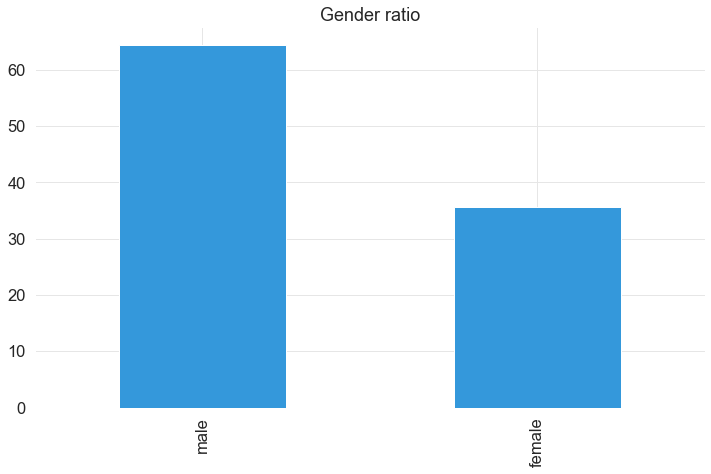

In [238]:
(df_input.sex.value_counts(normalize=True)*100).plot.bar().set_title("Gender ratio");
print ("Value counts based on gender:")
print (df_input.sex.value_counts(normalize=True)*100)

<h3 style='background-color:yellow'><br>
    There are 64% people are male and 35% people are female.<br>
</h3>  

In [239]:
survived_male_count = df_input [(df_input["survived"] ==1) &(df_input["sex"] == "male")]["sex"].count()
survived_female_count=df_input [(df_input["survived"] ==1) &(df_input["sex"] == "female")]["sex"].count()
total_count = len(df_input["sex"] )
survived_male_perc = (survived_male_count/total_count)*100
survived_female_perc = (survived_female_count/total_count)*100

not_survived_male_perc=100-survived_male_perc
not_survived_female_perc=100-survived_female_perc

Survival ratios based on gender: 
          survived  NotSurvived
male    12.299465    87.700535
female  25.897632    74.102368


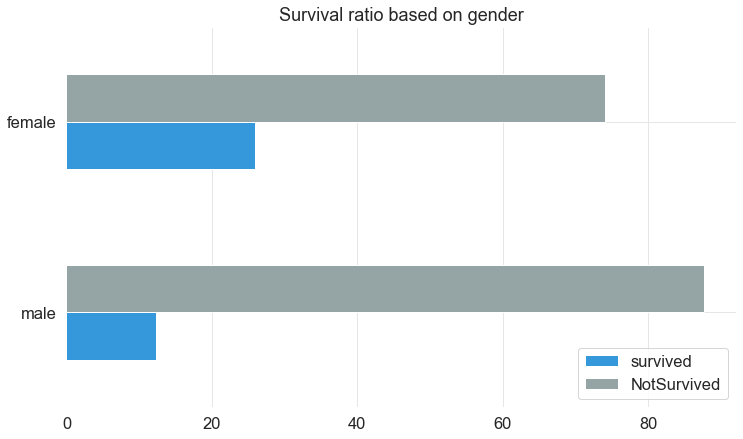

In [240]:
df_sex_survive=pd.DataFrame({"survived":{"male":survived_male_perc,"female":survived_female_perc}, "NotSurvived":{"male":not_survived_male_perc,"female":not_survived_female_perc}})
df_sex_survive.plot.barh().set_title("Survival ratio based on gender");
print ("Survival ratios based on gender: \n",df_sex_survive)

<h3 style='background-color:yellow'><br>
    87% males are not able to survive. <br>
    74% females are not able to survive.<br>
</h3>  

In [241]:
#Age information
print ("Age data information:")
df_input.age.describe()

Age data information:


count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

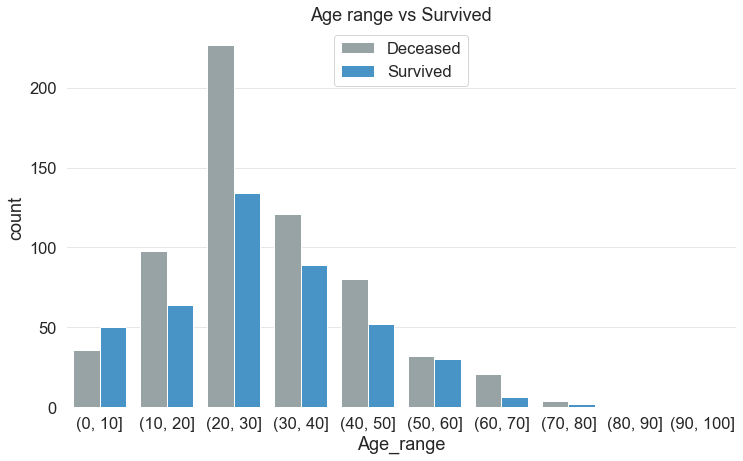

In [242]:
df_input['Age_range']=pd.cut(df_input.age, [0,10,20,30,40,50,60,70,80,90,100])
sns.countplot(x="Age_range",data=df_input,hue="survived",palette=["C1","C0"]).set_title("Age range vs Survived");
plt.legend(labels=["Deceased","Survived"]);

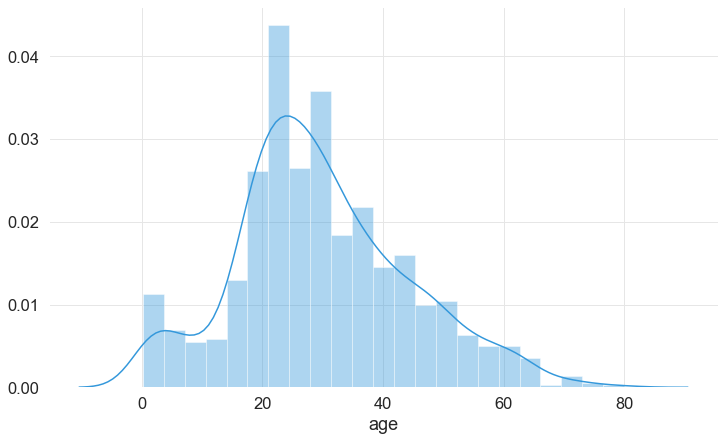

In [243]:
sns.distplot(df_input.age);

<h3 style='background-color:yellow'><br>
    Age ranges vary from 1 month to 80 year old. <br>
    People in the age range of 20-30 have more casualities than others.<br>
</h3>

In [244]:
print ("Sibsp data information :")
df_input.sibsp.describe()

Sibsp data information :


count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

<h3 style='background-color:yellow'><br>
sibsp is the number of siblings or spouse of a person on board.
Maximum of 8 siblings/spouses travelled along with one of the tourists.<br>
</h3>

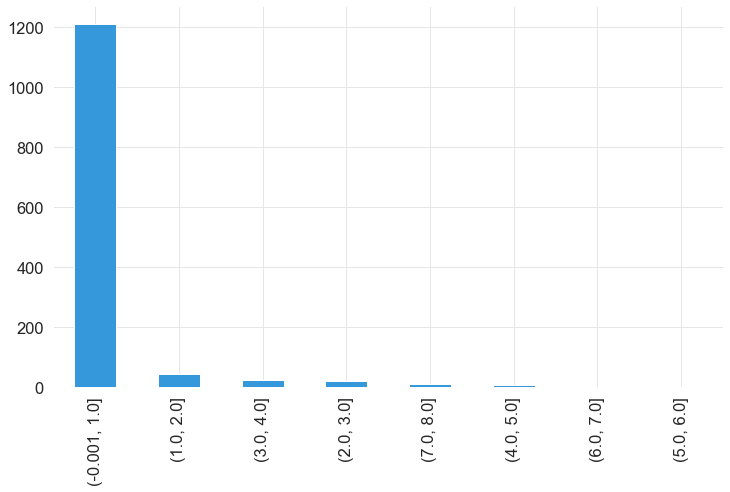

In [245]:
ss=pd.DataFrame()
ss['survived']=df_input.survived
ss['sibling_spouse']=pd.cut(df_input.sibsp,[0,1,2,3,4,5,6,7,8],include_lowest=True)
(ss.sibling_spouse.value_counts()).plot.bar();

<h3 style='background-color:yellow'><br>
    parch is the feature contained the number of parents/children each passenger was travelling with. <br>
    A maximum of 9 parents/children travelled along with one of the passenger. <br>
    There are more number of passengers who is travelled with maximum 1 parents/childrens <br>
    People travelled alone also could not able to survive much.
    <br>
</h3>    

In [246]:
print ("parch data information")
df_input.parch.describe()

parch data information


count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [247]:
pc=pd.DataFrame()
pc["parch_bins"]= pd.cut(df_input.parch,[0,1,2,3,4,5,6,7,8,9],include_lowest=True)
pc["survived"]=df_input.survived

parch bins value counts
(-0.001, 1.0]    1172
(1.0, 2.0]        113
(2.0, 3.0]          8
(4.0, 5.0]          6
(3.0, 4.0]          6
(8.0, 9.0]          2
(5.0, 6.0]          2
(7.0, 8.0]          0
(6.0, 7.0]          0
Name: parch_bins, dtype: int64


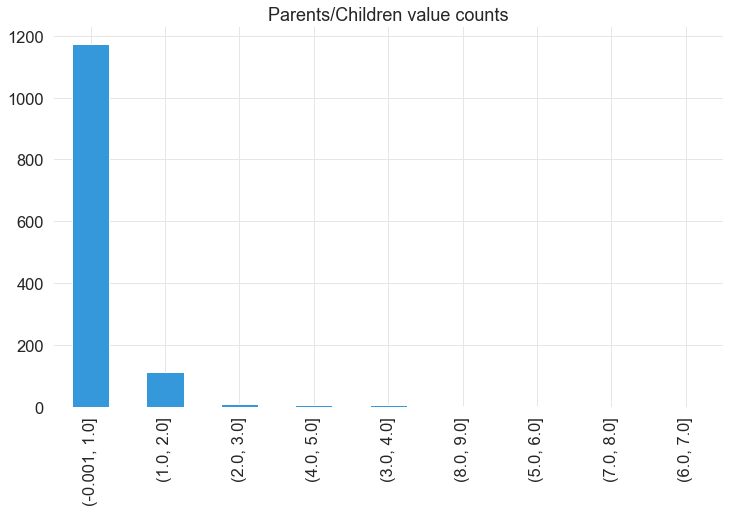

In [248]:
print ("parch bins value counts")
print (pc.parch_bins.value_counts())
pc.parch_bins.value_counts().plot.bar().set_title("Parents/Children value counts");

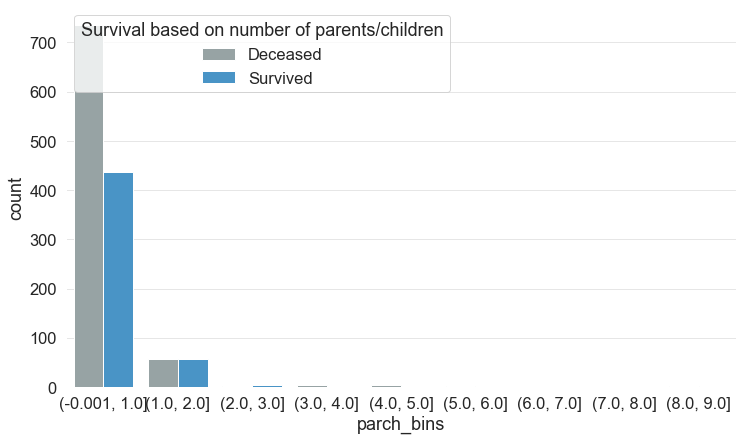

In [249]:
x=sns.countplot(data=pc,x="parch_bins", hue="survived",palette=["C1","C0"]).legend(labels=["Deceased","Survived"])
x.set_title("Survival based on number of parents/children")

In [250]:
df_input['Family']= df_input.parch + df_input.sibsp
df_input['is_alone'] = (df_input.Family == 0)

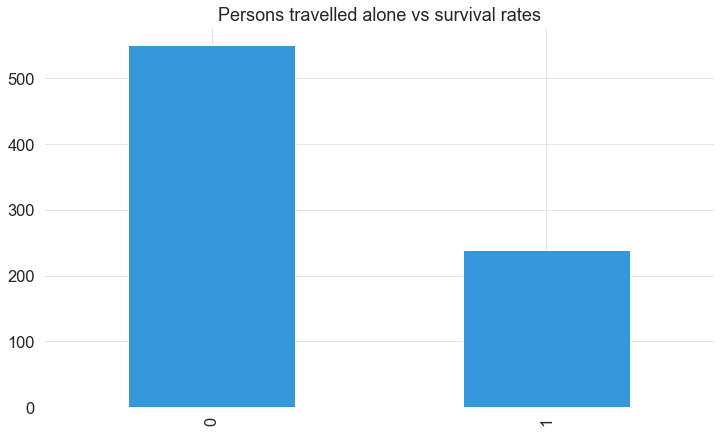

In [251]:
df_input[df_input['is_alone'] ==  True]["survived"].value_counts().plot.bar().set_title("Persons travelled alone vs survival rates");

<h3 style='background-color:yellow'>
    <br>
    As the feature 'Ticket' does not provide any additional information, we can remove this feature from dataset.<br>
</h3>

<h3 style='background-color:yellow'>
    <br>People who paid more had a high chances of survival.<br>
    
</h3>

In [252]:
print ("Fare data information:")
df_input.fare.describe()

Fare data information:


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [253]:
#Create bins for fare
df_input['Fare_Bins']=pd.cut(df_input.fare,bins=[0,7.9,14.45,31.27,512], labels=['Low','Mid','High_Mid','High'])

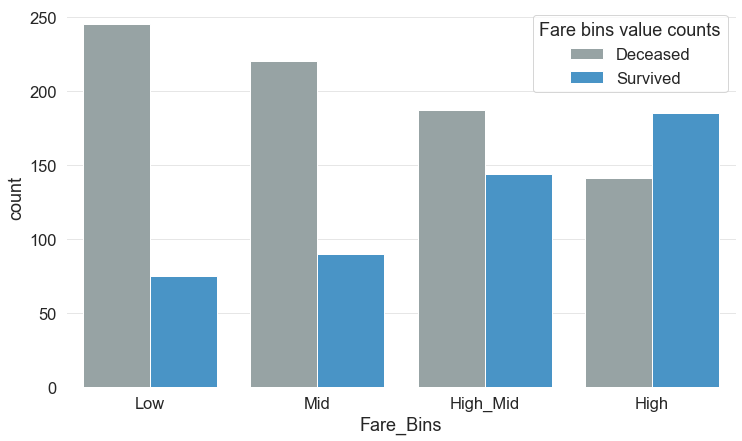

In [254]:
sns.countplot(x="Fare_Bins",data = df_input, hue="survived",palette=["C1","C0"]).legend(labels=['Deceased',"Survived"]).set_title("Fare bins value counts");

<h3 style='background-color:yellow'>
<br>Embarked signifies where the traveler boarded from. There are three possible values for Embark - Southampton,Cherbourg and Queenstown.<br>
Most people boarded from Cherbourg survived than from other places.
<br>
</h3>

In [255]:
print ("Unique Embarked values:")
df_input.embarked.unique()

Unique Embarked values:


array(['S', 'C', nan, 'Q'], dtype=object)

Text(0.5, 1.0, 'Embarked vs Survival rates')

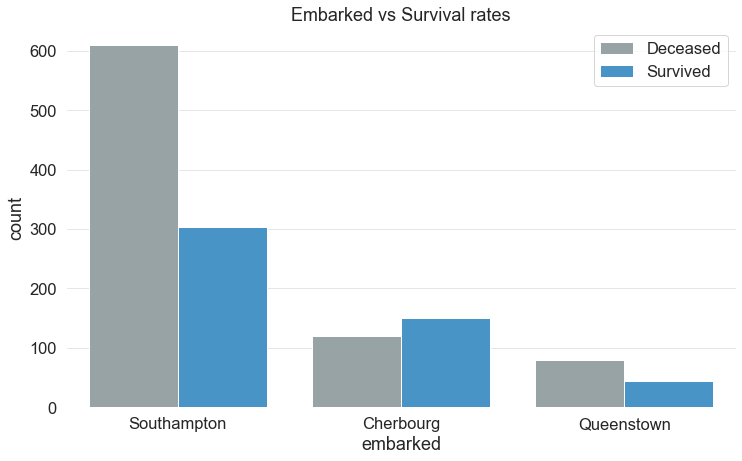

In [256]:
x=sns.countplot(x="embarked" , data=df_input, hue="survived",palette=["C1","C0"]);
x.set_xticklabels(["Southampton","Cherbourg","Queenstown"]);
x.legend(labels=["Deceased","Survived"]);
x.set_title("Embarked vs Survival rates")

In [257]:
#Find the number of bodies not able to find 
print ("Number of not survived people whose body is not able to find:")
df_input[df_input["survived"]==0]["body"].isnull().sum()

Number of not survived people whose body is not able to find:


688

<h3 style='background-color:yellow'>
body of 688 people could not able to find/identify
    </h3>

## <center>Data Imputation</center>

In [258]:
df_input.embarked.mode()[0]
df_input.embarked.fillna(df_input.embarked.mode()[0],inplace=True)

<h3 style='background-color:yellow'><br>
    Embarked feature has two missing values. Since most of the people are boarded from Southampton, the probability of boarding from Southampton is high. Hence imputing the missing values with Southampton.<br>
</h3>

In [259]:
#Create a new field for salutation / title
df_input["Salutation"] = df_input["name"].apply(lambda name:name.split(",")[1].split(".")[0].strip())

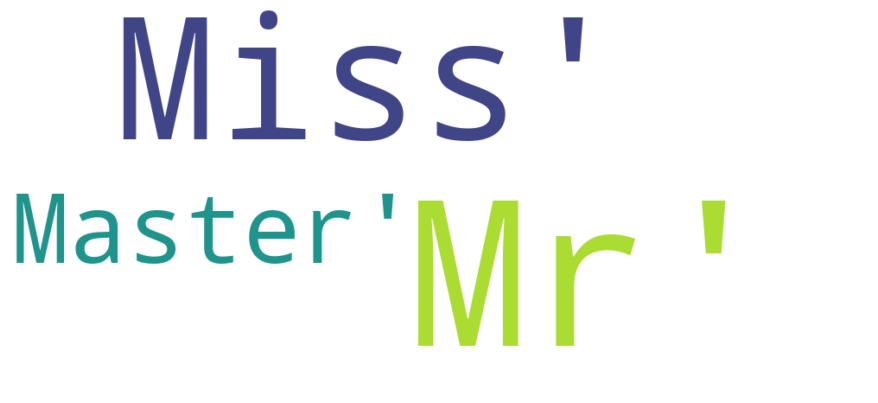

Salutation value counts:


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
the Countess      1
Dona              1
Jonkheer          1
Lady              1
Capt              1
Sir               1
Don               1
Mme               1
Name: Salutation, dtype: int64

In [260]:
wc=WordCloud(width=1000, height=450,background_color='white').generate(str(df_input.Salutation.values))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print ("Salutation value counts:")
df_input.Salutation.value_counts()

In [261]:
grp=df_input.groupby(['sex','Salutation'])

In [262]:
df_input.age=grp.age.apply(lambda x: x.fillna(x.median()))

<h3 style='background-color:yellow'>
    There are missing values for age feature.<br>
    Grouping the sex and salutation features and filling this group median value for missing values for age.
</h3>

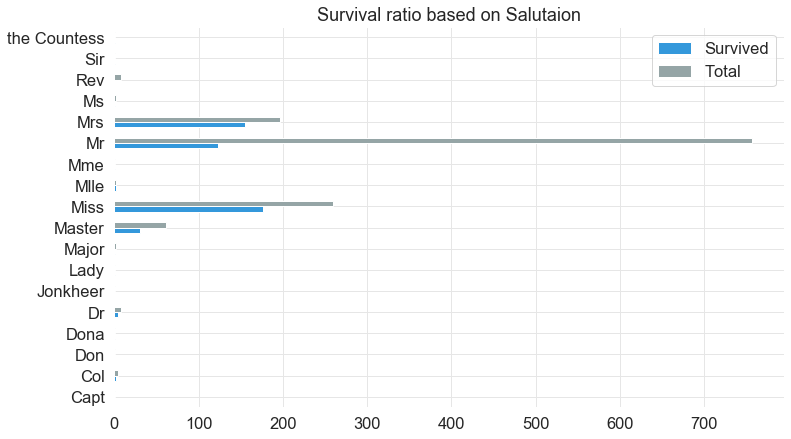

In [263]:
sal_df= pd.DataFrame(
{
    "Survived": df_input[df_input["survived"]==1].Salutation.value_counts(),
    "Total": df_input.Salutation.value_counts(),
})
s = sal_df.plot.barh().set_title("Survival ratio based on Salutaion");

<h3 style='background-color:yellow'><br>
    People with salutation 'Mr' had more casualities.<br>
</h3>

In [264]:
#Filling missing values for cabin with 'NA'
df_input.cabin.fillna('NA', inplace=True)

<h3 style='background-color:yellow'><br>
    Filling the missing values for Cabin with 'NA' <br>
</h3>

## <center> Encoding and dropping columns</center>
<p>
Using pandas 'get_dummies' we encoded the categorical data. </p>

In [265]:
df_input = pd.concat([df_input,pd.get_dummies(df_input["cabin"],prefix="cabin")], axis=1)

In [266]:
df_input = pd.concat([df_input,pd.get_dummies(df_input["embarked"],prefix="Emb")], axis=1)

In [267]:
df_input = pd.concat([df_input,pd.get_dummies(df_input["Salutation"],prefix="Title")], axis=1)

In [268]:
df_input = pd.concat([df_input,pd.get_dummies(df_input["Fare_Bins"],prefix="Fare")], axis=1)

In [269]:
df_input = pd.concat([df_input,pd.get_dummies(df_input["pclass"],prefix="Class")], axis=1)

In [270]:
df_input['sex']=LabelEncoder().fit_transform(df_input['sex'])

In [271]:
df_input['is_alone']=LabelEncoder().fit_transform(df_input.is_alone)

In [272]:
df_input.drop(["pclass","boat","body","home.dest","fare","cabin","Fare_Bins","name","Salutation","ticket","embarked","Age_range","sibsp","parch","age"], axis=1, inplace=True)

In [273]:
#Print the complete column names
#df_input.info(verbose=True)

In [274]:
#Check for any null values
#df_input.isnull().sum().any()

In [275]:
#dependent variable
y = df_input.survived
#independent variables
x=df_input.drop(["survived"],axis=1)

In [276]:
#train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=1)
print (f'Training data: dependent features shape {x_train.shape} independent feature shape {y_train.shape}' )
print (f'Testing data: dependent features shape {x_test.shape} independent feature shape {y_test.shape}' )

Training data: dependent features shape (1047, 218) independent feature shape (1047,)
Testing data: dependent features shape (262, 218) independent feature shape (262,)


In [277]:
#Initiate classifier
rfc=RandomForestClassifier()

In [278]:
#Train the model
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [279]:
#predict using the model
y_predict=rfc.predict(x_test)

In [280]:
accuracy=accuracy_score(y_predict,y_test)
print (f'Accuracy score {accuracy}')

Accuracy score 0.7977099236641222


array([[141,  15],
       [ 38,  68]], dtype=int64)

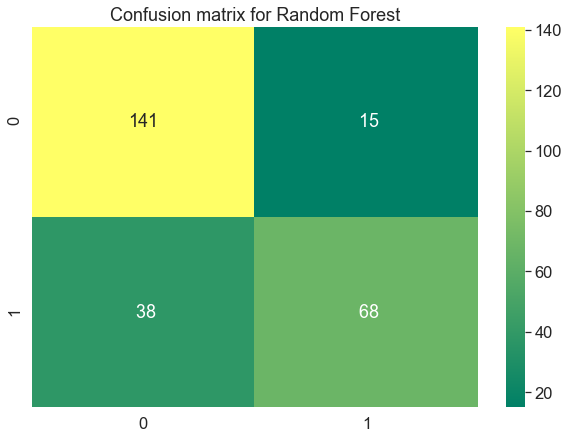

In [281]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, cmap="summer", fmt='3.0f');
plt.title("Confusion matrix for Random Forest")
confusion_matrix(y_test,y_predict)

In [282]:
#Comparison result to csv file
compare_df=pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
compare_df.to_csv("compare.csv")